<a href="https://colab.research.google.com/github/CarmelaRS/CarmelaPythonLUCATIC/blob/main/PELICULAS_DF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EJERCICIO PRACTICO CON PANDAS -- PELICULAS

## Explora y analiza el conjunto de datos de peliculas

### PARTE 1. EXPLORACION BASICA DE DATAFRAME

1.   CARGAR ARCHICO CSV EN DATAFRAME
# EXPLORAR EL DF
2.   MOSTRAR LAS 5 PRIMERAS Y 5 ULTIMAS FILAS DE DF
3.   OBTENER INFO GENERAL DEL DF, COMO EL NUMERO DE FILAS, COLUMNAS Y TIPO DE DATOS
# ENRIQUECER DATOS
4.   BUSCA INFO SOBRE LOS PROTAGONISTAS Y LO QUE COBRARON POR LAS PELICULAS Y SU AÑO DE NACIEMIENTO

# CALCULOS Y MANIPULACION
5. AÑADE LAS COLUMNAS NECESARIAS CON LOS DATOS DEL PROTAGONISTA
6. BUSCA RELACIONES ENTRE GENERO, RENTABILIDAD Y EDAD DEL PROTAGONISTA AL HACER LA PELICULA
7. BUSCA RELACIONES ENTRE LA RENTABILIDAD DE LA PELICULA Y EL COSTE DEL PROTAGONISTA
8. BUSCA CULAQUIER OTRA RELACION EN LOS DATOS QUE TE RESULTE DE INTERES


In [52]:
# LIBRERIAS NECESARIAS
import pandas as pd
import numpy as np

# Para poner las columnas nuevas
from google.colab import userdata
import requests
import time

# Para el primer grafico
import altair as alt

# Para la ultima grafica
from matplotlib import pyplot as plt


In [31]:
# CARGAMOS EL ARCHIVO CSV EN DF

df = pd.read_csv('https://drive.google.com/uc?export=download&id=1033_pgXO86pl9hwlIvGZZtNgmbiYJ7ps')
# Imprimimos el dataframe
print(df.to_string(index=False))

 ID                                            Película  Año de Emisión          Género  Duración (minutos)  Calificación IMDB  Recaudación  Presupuesto  Ganancias
  1                                              Avatar            2009 Ciencia ficción                 162                7.8   2923706026    237000000 5543706026
  2                                 Vengadores: Endgame            2019          Acción                 181                8.4   2799439100    356000000 3159439100
  3                                            Avatar 2            2022 Ciencia ficción                 190                8.1   2320250233    250000000 2070250233
  4                                             Titanic            1997           Drama                 195                7.8   2264743180    200000000 2064743180
  5 Star Wars: Episodio VII - El despertar de la Fuerza            2015 Ciencia ficción                 138                7.8   2071521700    245000000 1826521700
  6             

In [32]:
# Explorar DF
# 2. MOSTRAR LAS 5 PRIMERAS Y 5 ULTIMAS FILAS
print("PRIMERAS FILAS")
df.head()

PRIMERAS FILAS


,ID,Película,Año de Emisión,Género,Duración (minutos),Calificación IMDB,Recaudación,Presupuesto,Ganancias
0,1,Avatar,2009,Ciencia ficción,162,7.8,2923706026,237000000,5543706026
1,2,Vengadores: Endgame,2019,Acción,181,8.4,2799439100,356000000,3159439100
2,3,Avatar 2,2022,Ciencia ficción,190,8.1,2320250233,250000000,2070250233
3,4,Titanic,1997,Drama,195,7.8,2264743180,200000000,2064743180
4,5,Star Wars: Episodio VII - El despertar de la F...,2015,Ciencia ficción,138,7.8,2071521700,245000000,1826521700


In [33]:
print("ULTIMAS FILAS")
df.tail()

ULTIMAS FILAS


,ID,Película,Año de Emisión,Género,Duración (minutos),Calificación IMDB,Recaudación,Presupuesto,Ganancias
7,8,Jurassic World,2015,Ciencia ficción,124,7.0,1670516444,150000000,1520516444
8,9,El Rey León,2019,Animación,89,7.1,1663075439,260000000,1403075439
9,10,Los Vengadores,2012,Acción,143,8.0,1520538515,220000000,1300538515
10,11,Frozen II,2019,Animación,103,6.8,1453000000,150000000,1303000000
11,12,La Bella y la Bestia,2017,Romance,129,7.1,1264000000,160000000,1104000000


In [34]:
# 3. OBTENER INFORMACION DEL DF
# Exploramos el DF. Vemos su informacion
print("INFORMACION DEL DF")
df.info()

INFORMACION DEL DF
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  12 non-null     int64  
 1   Película            12 non-null     object 
 2   Año de Emisión      12 non-null     int64  
 3   Género              12 non-null     object 
 4   Duración (minutos)  12 non-null     int64  
 5   Calificación IMDB   12 non-null     float64
 6   Recaudación         12 non-null     int64  
 7   Presupuesto         12 non-null     int64  
 8   Ganancias           12 non-null     int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 992.0+ bytes


In [ ]:
print("DESCRIPCION DEL DF")
df.describe()

In [ ]:
print("FILAS  // COLUMNAS")
df.shape

In [ ]:
print("TIPO DE DATOS")
df.dtypes

In [46]:
# 4. y 5. INFO SOBRE LOS PROTAGONISTAS, LO QUE COBRARON POR LA PELICULA Y SU AÑO DE NACIEMIENTO
# Añadimos el identificador para despues encontrar los actores
ids_imbdb = pd.Series(['tt0499549', 'tt4154796', 'tt1630029', 'tt0120338', 'tt2488496', 'tt4154756', 'tt10872600', 'tt0369610', 'tt6105098', 'tt0848228', 'tt4520988', 'tt2771200'])
df['imdbID'] = ids_imbdb
df

,ID,Película,Año de Emisión,Género,Duración (minutos),Calificación IMDB,Recaudación,Presupuesto,Ganancias,imdbID,Actors,Budget
0,1,Avatar,2009,Ciencia ficción,162,7.8,2923706026,237000000,5543706026,tt0499549,"Sam Worthington, Zoe Saldana, Sigourney Weaver","$785,221,649"
1,2,Vengadores: Endgame,2019,Acción,181,8.4,2799439100,356000000,3159439100,tt4154796,"Robert Downey Jr., Chris Evans, Mark Ruffalo","$858,373,000"
2,3,Avatar 2,2022,Ciencia ficción,190,8.1,2320250233,250000000,2070250233,tt1630029,"Sam Worthington, Zoe Saldana, Sigourney Weaver","$684,075,767"
3,4,Titanic,1997,Drama,195,7.8,2264743180,200000000,2064743180,tt0120338,"Leonardo DiCaprio, Kate Winslet, Billy Zane","$674,292,608"
4,5,Star Wars: Episodio VII - El despertar de la F...,2015,Ciencia ficción,138,7.8,2071521700,245000000,1826521700,tt2488496,"Daisy Ridley, John Boyega, Oscar Isaac","$936,662,225"
5,6,Vengadores: Infinity War,2018,Acción,149,8.4,2052359754,321000000,1732359754,tt4154756,"Robert Downey Jr., Chris Hemsworth, Mark Ruffalo","$678,815,482"
6,7,Spider-Man: No Way Home,2021,Acción,148,8.2,1921704167,200000000,1721704167,tt10872600,"Tom Holland, Zendaya, Benedict Cumberbatch","$814,866,759"
7,8,Jurassic World,2015,Ciencia ficción,124,7.0,1670516444,150000000,1520516444,tt0369610,"Chris Pratt, Bryce Dallas Howard, Ty Simpkins","$653,406,625"
8,9,El Rey León,2019,Animación,89,7.1,1663075439,260000000,1403075439,tt6105098,"Donald Glover, Beyoncé, Seth Rogen","$543,638,043"
9,10,Los Vengadores,2012,Acción,143,8.0,1520538515,220000000,1300538515,tt0848228,"Robert Downey Jr., Chris Evans, Scarlett Johan...","$623,357,910"


In [ ]:
# Añadimos la columna de actores, $$ y el año de nacimiento

# Creamos las variables de las APIS
OMDB_URL = "http://www.omdbapi.com"  # La URL base de la API de OMDB
OMDB_TOKEN = "3c969dd7"  # Mi API Key

# Creamos las columnas vacias en el df
df['Actors'] = ' '
df['Budget'] = ' '


for id in ids_imbdb:

    # Construimos la URL de la API
    url = f"{OMDB_URL}/?apikey={OMDB_TOKEN}&i={id}"

    # Realizar solicitud a la API de OMDB
    respuesta = requests.get(url)
    df_datos = respuesta.json()

    # Extraer la información de la respuesta
    actors = df_datos.get('Actors', 'N/A')
    box_office = df_datos.get('BoxOffice', 'N/A')  # El presupuesto está en BoxOffice

    # Asignar los valores a las columnas correspondientes
    df.loc[df['imdbID'] == id, 'Actors'] = actors
    df.loc[df['imdbID'] == id, 'Budget'] = box_office


    # Esperar para no exceder los límites de la API
    time.sleep(0.5)

# MOSTRAMOS EL DF CON TODAS LAS COLUMNAS AÑADIDAS
df

In [48]:
# 6. Relacion entre GENERO, RENTABILIDAD Y EDAD del protagonista
#7. Relacion entre RENTABILIDAD Y COSTE del protagonista
#8. Otras relaciones

# GANACIAS VS. CALIFICACION IMDB, COLOREADO POR GENERO
alt.Chart(df).mark_circle().encode(
    x='Ganancias' ,
    y='Calificación IMDB',
    color='Género',
    tooltip=['Película', 'Ganancias', 'Calificación IMDB', 'Género']
).interactive()

alt.Chart(...)

### CONCLUSIONES DEL GRAFICO
1. Rango de ganancias  
La mayoría de las películas tienen ganancias por debajo de los 2,000,000,000.  

2. Distribución de las calificaciones IMDB  
Las calificaciones IMDB oscilan entre 7 y 8 indicando un rango de calificación aceptable a muy buena.  

3. Comparación por género  
Las peliculas de accion son las que mayor calificacion tienen y las de animacion las que menos.  
En cuanto a las ganacias, las peliculas de Ciencia ficcion son las que mayor ganancia dan.    


In [51]:
df['Ganancias_por_minuto'] = df['Ganancias']/df['Duración (minutos)']

# Mostramos resultados
print(df[['Película', 'Ganancias_por_minuto']])

                                             Película  Ganancias_por_minuto
0                                              Avatar          3.422041e+07
1                                 Vengadores: Endgame          1.745546e+07
2                                            Avatar 2          1.089605e+07
3                                             Titanic          1.058843e+07
4   Star Wars: Episodio VII - El despertar de la F...          1.323566e+07
5                            Vengadores: Infinity War          1.162658e+07
6                             Spider-Man: No Way Home          1.163314e+07
7                                      Jurassic World          1.226223e+07
8                                         El Rey León          1.576489e+07
9                                      Los Vengadores          9.094675e+06
10                                          Frozen II          1.265049e+07
11                               La Bella y la Bestia          8.558140e+06


### CONCLUSIONES
La pelicula que mas ganancia da por minuto es "Avatar" y la que menos ha sido "La Bella y la Bestia"

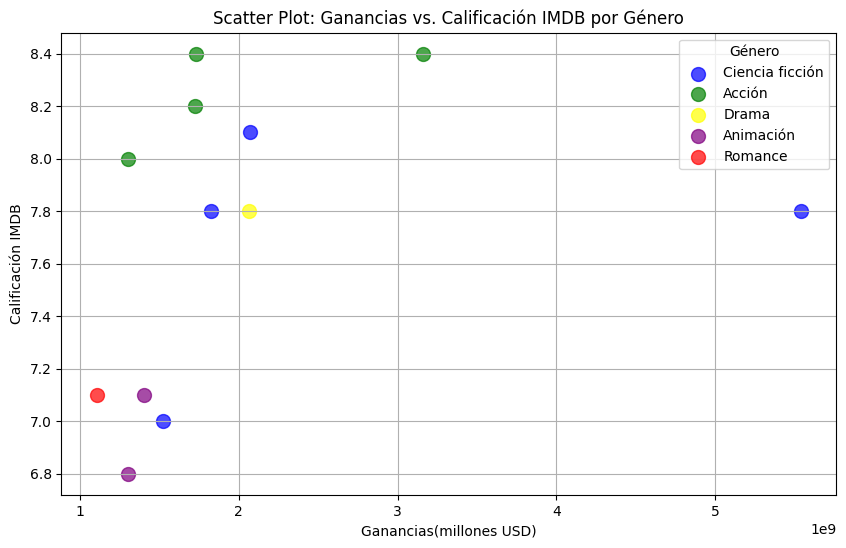

In [53]:
colores = {
    'Ciencia ficción': 'blue',
    'Romance': 'red',
    'Acción': 'green',
    'Drama': 'yellow',
    'Animación': 'purple'
}

plt.figure(figsize=(10, 6))
for genero in df['Género'].unique():
    subset = df[df['Género'] == genero]
    plt.scatter(subset['Ganancias'], subset['Calificación IMDB'], label=genero, color=colores[genero], s=100, alpha=0.7)

# Etiquetas para el titulo
plt.title('Scatter Plot: Ganancias vs. Calificación IMDB por Género')
plt.xlabel('Ganancias(millones USD)')
plt.ylabel('Calificación IMDB')

# Leyenda
plt.legend(title='Género')

plt.grid(True)

# Mostramos grafico
plt.show()